In [5]:
!python -m spacy download en

     -------------------------------------- 12.8/12.8 MB 277.8 kB/s eta 0:00:00
[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use
the full pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy

from matplotlib.pyplot import imread
from wordcloud import WordCloud
%matplotlib inline

In [10]:
book = pd.read_csv('apple.txt', error_bad_lines = False)
book.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_47632\4206863517.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  book = pd.read_csv('apple.txt', error_bad_lines = False)
b'Skipping line 6: expected 1 fields, saw 14\n'


,x
0,It's amazing..... battery last around 10 -12 h...
1,Finally a MacBook possession. Got it in 50k in...
2,Best Laptop under 60k. If you don't want any a...
3,Pros:1. Light weight and super fast response t...
4,""""


In [15]:
book = [x.strip() for x in book.x]
book = [x for x in book if x]
book

AttributeError: 'list' object has no attribute 'x'

In [16]:
len(book)

40

In [17]:
book

["It's amazing..... battery last around 10 -12 hrs.....best laptop for students and coders",
 "Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by wo

In [34]:
#parts of speech
nlp = spacy.load('en_core_web_sm')

one_block = book[2]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [35]:
one_block

"Best Laptop under 60k. If you don't want any accounting softwares like tally or busy then go for it, better than windows in every term. I just love it's battery life with sleek look 😍Now talking about MS officeIt's available on app store, free for 1 monthAfter that you will have to pay.You cannot install pirated version but if you install Windows 7 or any other version then u can use Ms office for freeBut in MacBook there are other apps which are good substitute for Ms office appsNumbers for ExcelPages for wordKeynote for PowerPointAnd you can convert your numbers file to Excel file or csv fileSame for the pages & keynoteSo no need of Ms office for me.Cons1. U cannot play games, your laptop will just heat up, battery will drain* U cannot play pubg mobile on emulator if you are pubg lover😁2. Storage 128gb, it will work fine but if you want to store movies or TV shows u can't, u have to buy external hard disk"

In [36]:
doc_block

Best Laptop under 60k. If you don't want any accounting softwares like tally or busy then go for it, better than windows in every term. I just love it's battery life with sleek look 😍Now talking about MS officeIt's available on app store, free for 1 monthAfter that you will have to pay.You cannot install pirated version but if you install Windows 7 or any other version then u can use Ms office for freeBut in MacBook there are other apps which are good substitute for Ms office appsNumbers for ExcelPages for wordKeynote for PowerPointAnd you can convert your numbers file to Excel file or csv fileSame for the pages & keynoteSo no need of Ms office for me.Cons1. U cannot play games, your laptop will just heat up, battery will drain* U cannot play pubg mobile on emulator if you are pubg lover😁2. Storage 128gb, it will work fine but if you want to store movies or TV shows u can't, u have to buy external hard disk

In [37]:
for token in doc_block[0:20]:
    print(token, token.pos_)

Best ADJ
Laptop PROPN
under ADP
60k NOUN
. PUNCT
If SCONJ
you PRON
do AUX
n't PART
want VERB
any DET
accounting NOUN
softwares NOUN
like ADP
tally NOUN
or CCONJ
busy ADJ
then ADV
go VERB
for ADP


In [39]:
#filtering for noun and verbs only
noun_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(noun_verbs[5:25])

['go', 'windows', 'term', 'love', 'battery', 'life', 'look', 'talking', 'app', 'store', 'have', 'pay', 'install', 'pirated', 'version', 'install', 'version', 'use', 'office', 'are']


In [40]:
adjective_adposition = [token.text for token in doc_block if token.pos_ in ('ADJ','ADP')]
print(adjective_adposition)

['Best', 'under', 'like', 'busy', 'for', 'better', 'than', 'in', 'with', 'sleek', 'about', 'available', 'on', 'free', 'for', 'other', 'for', 'in', 'other', 'good', 'for', 'for', 'for', 'for', 'to', 'csv', 'for', 'of', 'for', 'up', 'on', 'external', 'hard']


In [45]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(noun_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']


wf_df[0:10]

,word,count
0,office,3
1,want,2
2,battery,2
3,store,2
4,have,2
5,install,2
6,version,2
7,file,2
8,play,2
9,60k,1


<AxesSubplot:title={'center':'Top verbs and nouns'}, xlabel='word'>

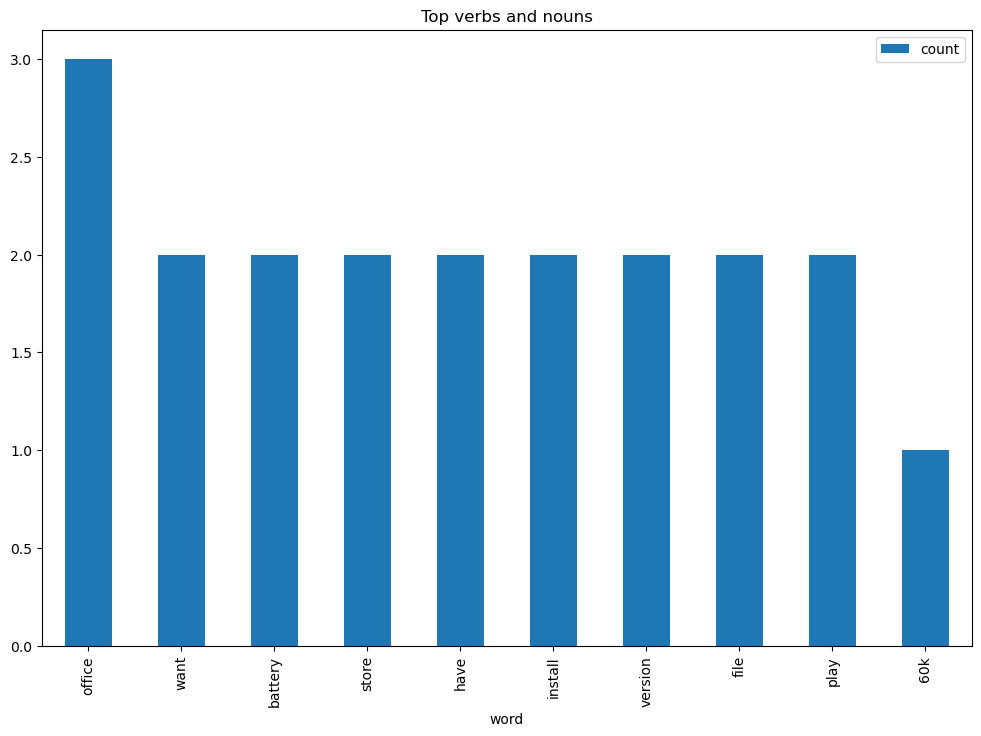

In [46]:
#Visualizing the result
#Barchart for 10 noun + verbs
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')